In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [87]:
train_x_path = 'output/train_biomarker_stats.csv'
train_x = pd.read_csv(train_x_path)
train_y_path = 'data/ppg_data/y_train.npy'
train_y = np.load(train_y_path)
train_y = pd.Series(train_y)

In [88]:
x_test_path = 'output/val_biomarker_stats.csv'
x_test = pd.read_csv(x_test_path)
y_test_path = 'data/ppg_data/y_val.npy'
y_test = np.load(y_test_path)
y_test = pd.Series(y_test)

In [89]:
print(x_test.shape)

(4674, 28)


In [90]:
print(y_test.shape)

(4674,)


In [91]:
print(data)

       Segment  Tpi_mean  Tpi_median   Tpi_std  Tpi_percentile_25  \
0            0  0.821176    0.790000  0.263056           0.600000   
1            1  1.005357    0.737500  0.357076           0.708333   
2            2  1.433684    1.440000  0.559250           0.960000   
3            3  0.925806    0.920000  0.058628           0.900000   
4            4  1.041538    0.860000  0.311667           0.785000   
...        ...       ...         ...       ...                ...   
14464    14464  0.761574    0.708333  0.217278           0.695833   
14465    14465  1.010714    1.170833  0.208914           0.831250   
14466    14466  0.814815    0.737500  0.188614           0.716667   
14467    14467  0.841071    0.712500  0.329249           0.593750   
14468    14468  0.865104    0.797917  0.167834           0.726042   

       Tpi_percentile_75   Tpi_iqr  Tpi_skew  Tpi_kurtosis   Tpi_mad  ...  \
0               0.955000  0.355000  0.992202      0.412458  0.208374  ...   
1               1

In [92]:
print(train_y)

0        1
1        1
2        1
3        1
4        0
        ..
14464    0
14465    1
14466    0
14467    1
14468    0
Length: 14469, dtype: int64


In [93]:
# data['labels'] = labels

C:\Users\jji24\AppData\Local\Temp\ipykernel_33564\1302569954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_y, order=np.sort(np.unique(train_y)), palette='hls', stat='percent')


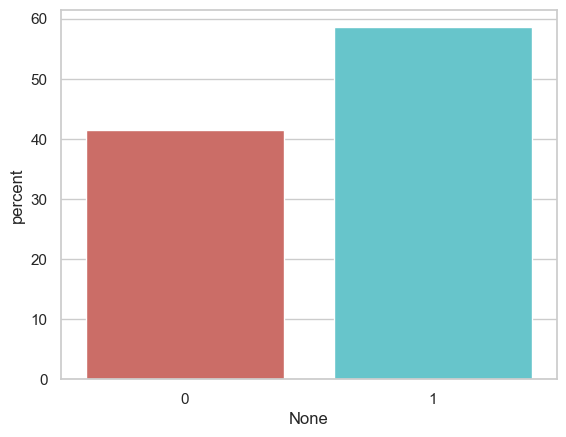

In [94]:
sns.countplot(x=train_y, order=np.sort(np.unique(train_y)), palette='hls', stat='percent')
plt.show()

In [95]:
train_x_clean = train_x.dropna()
train_y_clean = train_y.loc[data_clean.index]

In [96]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=8)
rfe = rfe.fit(train_x_clean, train_y_clean.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


c:\Users\jji24\AppData\Local\anaconda3\envs\PPG\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jji24\AppData\Local\anaconda3\envs\PPG\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[False  True False  True  True False False False False False  True  True
  True  True False False False False  True False False False False False
 False False False False]
[21  1  2  1  1  6  5 17 15  3  1  1  1  1  4  7 13 16  1 11 19  8 20 18
 14 12 10  9]


In [97]:
columns_selected = train_x_clean.columns[rfe.support_]
print(columns_selected)

Index(['Tpi_mean', 'Tpi_std', 'Tpi_percentile_25', 'Tpp_mean', 'Tpp_median',
       'Tpp_std', 'Tpp_percentile_25', 'Tpp_mad'],
      dtype='object')


In [98]:
import statsmodels.api as sm
os_train_x = train_x_clean[columns_selected]
logit_model=sm.Logit(train_y_clean, os_train_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.574184
         Iterations 6
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   y                Pseudo R-squared: 0.154     
Date:                 2025-05-02 14:09 AIC:              16624.8595
No. Observations:     14463            BIC:              16685.4943
Df Model:             7                Log-Likelihood:   -8304.4   
Df Residuals:         14455            LL-Null:          -9811.1   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       6.0000           Scale:            1.0000    
-------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Tpi_mean           -4.3998   1.6438 -2.6766 0.0074  -7.6216 -1.1780
Tpi_std             4.2438   0.7207  5.88

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(os_train_x, train_y_clean)

LogisticRegression()

In [100]:
os_x_test = x_test[columns_selected]
y_pred = logreg.predict(os_x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(os_x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1726  845]
 [ 401 1702]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2571
           1       0.67      0.81      0.73      2103

    accuracy                           0.73      4674
   macro avg       0.74      0.74      0.73      4674
weighted avg       0.75      0.73      0.73      4674



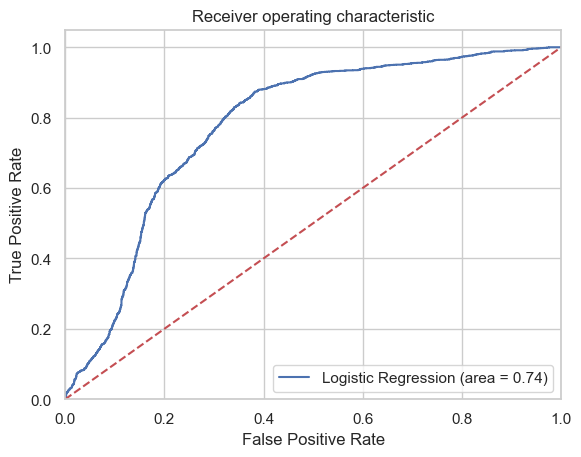

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(os_x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(os_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
print(labels.unique())  # Should show: [0, 2, 5]


[5 0 2]


In [71]:
import statsmodels.api as sm
os_data = data[columns_selected]
y = labels.astype('category')
print(y.cat.categories)
y_encoded = y.cat.codes
X = sm.add_constant(os_data)

Index([0, 2, 5], dtype='int32')


In [72]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_encoded,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.167124
         Iterations 10
                        Results: MNLogit
Model:              MNLogit          Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.502     
Date:               2025-05-01 01:11 AIC:              494.2878  
No. Observations:   1407             BIC:              557.2783  
Df Model:           10               Log-Likelihood:   -235.14   
Df Residuals:       1395             LL-Null:          -471.82   
Converged:          1.0000           LLR p-value:      2.1677e-95
No. Iterations:     10.0000          Scale:            1.0000    
-----------------------------------------------------------------
  y = 0      Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-----------------------------------------------------------------
  const     -3.1184    0.6078  -5.1307  0.0000   -4.3097  -1.9272
Tpi_std     11.5731   12.0402   0.9612  0.3365  -12.0253  35.171